In [1]:
# Harbinger Package
# version 1.0.50

source("https://raw.githubusercontent.com/cefet-rj-dal/harbinger/master/examples/jupyter_harbinger.R")

#loading Harbinger
load_harbinger() 

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message:
“replacing previous import ‘dplyr::filter’ by ‘stats::filter’ when loading ‘daltoolbox’”

Attaching package: ‘daltoolbox’


The following object is masked from ‘package:base’:

    transform


Loading required package: harbinger

Warning message:
“replacing previous import ‘TSPred::minmax’ by ‘daltoolbox::minmax’ when loading ‘harbinger’”


In [2]:
loadlibrary("reticulate")
source("https://raw.githubusercontent.com/cefet-rj-dal/harbinger/master/examples/ts_conv1d.R")
reticulate::source_python("https://raw.githubusercontent.com/cefet-rj-dal/harbinger/master/examples/ts_conv1d.py")

Loading required package: reticulate



In [3]:
#loading the example database
data(har_examples)

In [4]:
#Using the time series 1 
dataset <- har_examples[[1]]
head(dataset)

,serie,event
,<dbl>,<lgl>
1,1.0000000,FALSE
2,0.9689124,FALSE
3,0.8775826,FALSE
4,0.7316889,FALSE
5,0.5403023,FALSE
6,0.3153224,FALSE


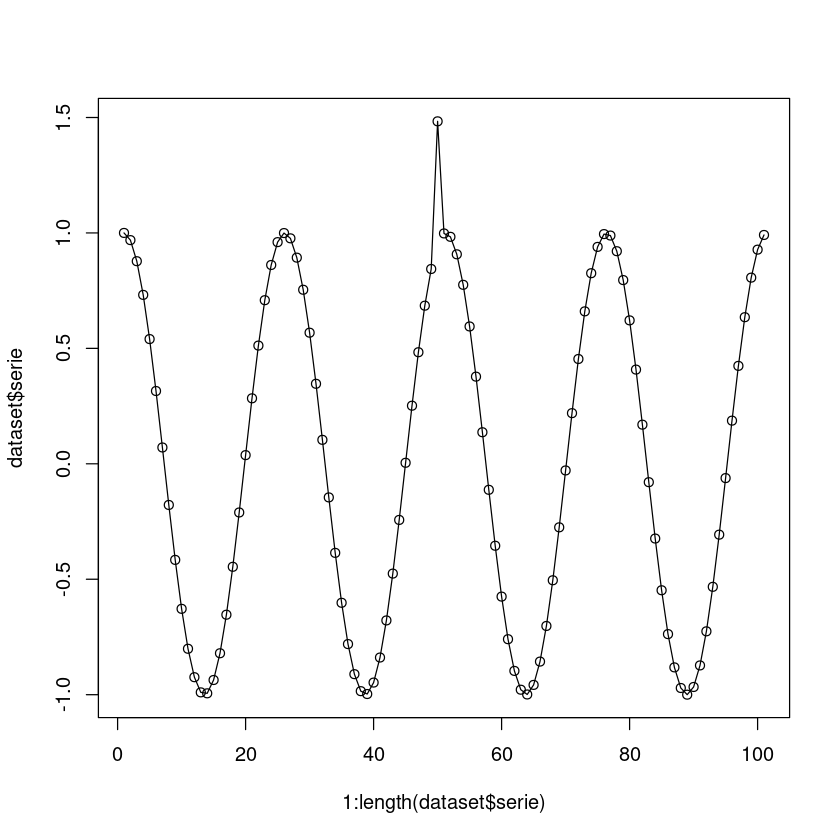

In [5]:
#ploting serie #1

plot(x = 1:length(dataset$serie), y = dataset$serie)
lines(x = 1:length(dataset$serie), y = dataset$serie)

In [6]:
# establishing conv1d method 
  model <- har_tsreg_sw(ts_conv1d(ts_gminmax(), input_size=4, epochs=10000))

In [7]:
# fitting the model
  model <- fit(model, dataset$serie)

ts_conv1d,0.203



In [8]:
# making detections using fbiad
  detection <- detect(model, dataset$serie)

In [9]:
# filtering detected events
  print(detection |> dplyr::filter(event==TRUE))

  idx event    type
1  24  TRUE anomaly
2  27  TRUE anomaly
3  50  TRUE anomaly
4  75  TRUE anomaly
5  77  TRUE anomaly
6 100  TRUE anomaly


In [10]:
# evaluating the detections
  evaluation <- evaluate(model, detection$event, dataset$event)
  print(evaluation$confMatrix)

          event      
detection TRUE  FALSE
TRUE      1     5    
FALSE     0     95   


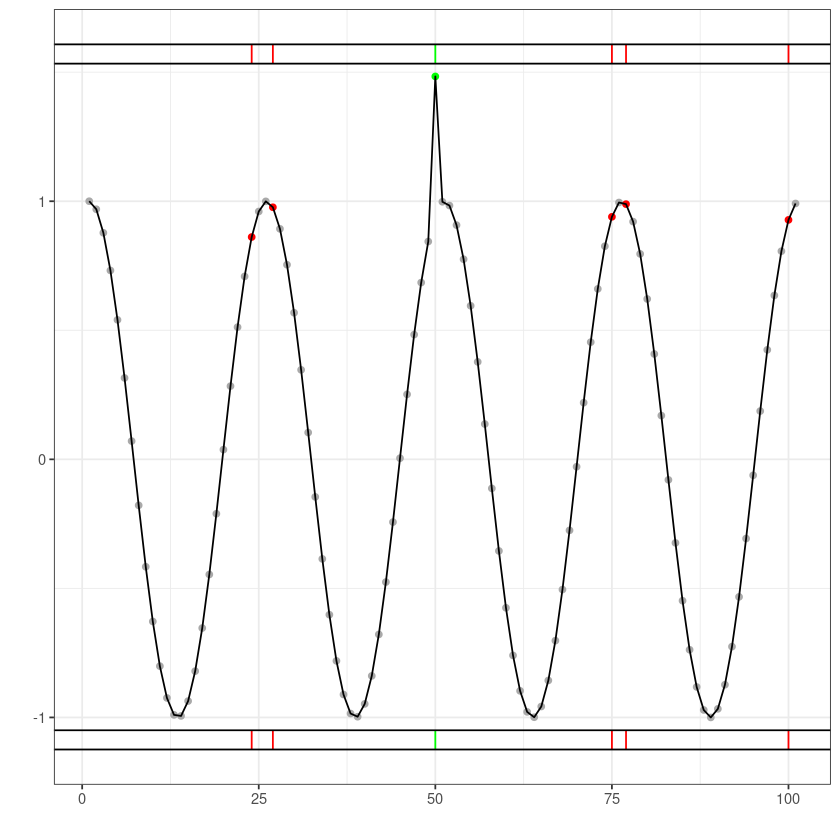

In [11]:
# ploting the results
  grf <- plot.harbinger(model, dataset$serie, detection, dataset$event)
  plot(grf)